In [1]:
import matplotlib.pyplot as plt
import gmaps
import pandas as pd
import requests
import numpy as np
import datetime

In [2]:
url = "https://data.cityofchicago.org/resource/tdab-kixi.json"
r = requests.get(url)
r

<Response [200]>

In [3]:
# call json
json = r.json()

In [4]:
# check what type of data the json file has
type(json)

list

In [74]:
# create a data frame from the json file
df = pd.DataFrame(json)
df.head(2)

landmark_name     id                    address  \
0  Vassar Swiss Underwear Company Building  L-265  2543 - 2545 W Diversey Av   
1                     Mathilde Eliel House  L- 89            4122 S Ellis Av   

  landmark_designation_date        latitude        longitude  \
0  2008-07-30T07:00:00.000Z  41.93162660840  -87.69210009570   
1  1991-10-02T07:00:00.000Z  41.81925575100  -87.60278799920   

                                            location  \
0  {'latitude': '41.9316266084', 'longitude': '-8...   
1  {'latitude': '41.819255751', 'longitude': '-87...   

  :@computed_region_rpca_8um6 :@computed_region_vrxf_vc4k  \
0                           1                          23   
1                          36                           2   

  :@computed_region_6mkv_f3dw :@computed_region_bdys_3d7i  \
0                       22535                         240   
1                        4301                         220   

  :@computed_region_43wa_7qmu :@computed_region_awaf_s7ux date_built  \
0                          40                          24        NaN   
1                          10                           1       1886   

          architect  
0               NaN  
1  Adler & Sullivan

In [75]:
# drop uncecessary columns
# #1 -using column name
# df2= df.drop(columns= [':@computed_region_rpca_8um6', ':@computed_region_vrxf_vc4k', ':@computed_region_6mkv_f3dw', ':@computed_region_bdys_3d7i',':@computed_region_43wa_7qmu', ':@computed_region_awaf_s7ux' ], axis = 1)
# df2

#2 - using column index number - much easier since you don't have to copy/paste the namae of the column
df2 = df.drop(df.columns[[7,8,9,10,11,12]], axis = 1)
df2.head(2)


landmark_name     id                    address  \
0  Vassar Swiss Underwear Company Building  L-265  2543 - 2545 W Diversey Av   
1                     Mathilde Eliel House  L- 89            4122 S Ellis Av   

  landmark_designation_date        latitude        longitude  \
0  2008-07-30T07:00:00.000Z  41.93162660840  -87.69210009570   
1  1991-10-02T07:00:00.000Z  41.81925575100  -87.60278799920   

                                            location date_built  \
0  {'latitude': '41.9316266084', 'longitude': '-8...        NaN   
1  {'latitude': '41.819255751', 'longitude': '-87...       1886   

          architect  
0               NaN  
1  Adler & Sullivan

In [76]:
# convert datetime column to just date
df2['landmark_designation_date'] = pd.to_datetime(df2['landmark_designation_date']).dt.date
df2.head(2)

landmark_name     id                    address  \
0  Vassar Swiss Underwear Company Building  L-265  2543 - 2545 W Diversey Av   
1                     Mathilde Eliel House  L- 89            4122 S Ellis Av   

  landmark_designation_date        latitude        longitude  \
0                2008-07-30  41.93162660840  -87.69210009570   
1                1991-10-02  41.81925575100  -87.60278799920   

                                            location date_built  \
0  {'latitude': '41.9316266084', 'longitude': '-8...        NaN   
1  {'latitude': '41.819255751', 'longitude': '-87...       1886   

          architect  
0               NaN  
1  Adler & Sullivan

In [77]:
##

df2['designation_year'] =  pd.DatetimeIndex(df2['landmark_designation_date']).year
df2.head(2)

landmark_name     id                    address  \
0  Vassar Swiss Underwear Company Building  L-265  2543 - 2545 W Diversey Av   
1                     Mathilde Eliel House  L- 89            4122 S Ellis Av   

  landmark_designation_date        latitude        longitude  \
0                2008-07-30  41.93162660840  -87.69210009570   
1                1991-10-02  41.81925575100  -87.60278799920   

                                            location date_built  \
0  {'latitude': '41.9316266084', 'longitude': '-8...        NaN   
1  {'latitude': '41.819255751', 'longitude': '-87...       1886   

          architect  designation_year  
0               NaN            2008.0  
1  Adler & Sullivan            1991.0

In [78]:
#remove decimal from 'designation year'
df2['designation_year'] = df2['designation_year'].astype(str).apply(lambda x: x.replace('.0',''))
df2.head(2)

landmark_name     id                    address  \
0  Vassar Swiss Underwear Company Building  L-265  2543 - 2545 W Diversey Av   
1                     Mathilde Eliel House  L- 89            4122 S Ellis Av   

  landmark_designation_date        latitude        longitude  \
0                2008-07-30  41.93162660840  -87.69210009570   
1                1991-10-02  41.81925575100  -87.60278799920   

                                            location date_built  \
0  {'latitude': '41.9316266084', 'longitude': '-8...        NaN   
1  {'latitude': '41.819255751', 'longitude': '-87...       1886   

          architect designation_year  
0               NaN             2008  
1  Adler & Sullivan             1991

In [79]:
#check how many rows in date_built have null values
count_nan = df['date_built'].isnull().sum()
print ('Count of NaN: ' + str(count_nan))
#results= 40

Count of NaN: 40


In [80]:
#drop the empty values
nan_value = float('NaN')
df2.replace('', nan_value, inplace = True)
df2.dropna(inplace = True)
df2.head(2)

landmark_name     id            address landmark_designation_date  \
1  Mathilde Eliel House  L- 89    4122 S Ellis Av                1991-10-02   
2    Manhattan Building  L-139  431 S Dearborn St                1978-07-07   

         latitude        longitude  \
1  41.81925575100  -87.60278799920   
2  41.87606572340  -87.62896445050   

                                            location date_built  \
1  {'latitude': '41.819255751', 'longitude': '-87...       1886   
2  {'latitude': '41.8760657234', 'longitude': '-8...       1891   

                architect designation_year  
1        Adler & Sullivan             1991  
2  William LeBaron Jenney             1978

In [82]:
#make sure all the columns have the same number of rows
df2.count()

landmark_name                270
id                           270
address                      270
landmark_designation_date    270
latitude                     270
longitude                    270
location                     270
date_built                   270
architect                    270
designation_year             270
dtype: int64

In [83]:
#remove decimal from 'designation year'
df2['date_built'] = df2['date_built'].astype(str).apply(lambda x: x.replace(', ','-'))
df2['date_built'] = df2['date_built'].astype(str).apply(lambda x: x.replace('& ','-'))
df2['date_built'] = df2['date_built'].astype(str).apply(lambda x: x.replace('&','-'))
df2['date_built'] = df2['date_built'].astype(str).apply(lambda x: x.replace(',','-'))
df2['date_built'] = df2['date_built'].astype(str).apply(lambda x: x.replace('`','-'))
df2.head(4)

landmark_name     id  \
1                               Mathilde Eliel House  L- 89   
2                                 Manhattan Building  L-139   
3  Machinery Hall at Illinois Institute of Techno...  L- 12   
4                             Melissa Ann Elam House  L- 88   

                              address landmark_designation_date  \
1                     4122 S Ellis Av                1991-10-02   
2                   431 S Dearborn St                1978-07-07   
3                       100 W 33rd St                2004-05-26   
4  4726 S Dr Martin Luther King Jr Dr                1979-03-21   

         latitude        longitude  \
1  41.81925575100  -87.60278799920   
2  41.87606572340  -87.62896445050   
3  41.83516141220  -87.62922122350   
4  41.80852976900  -87.61720439490   

                                            location date_built  \
1  {'latitude': '41.819255751', 'longitude': '-87...       1886   
2  {'latitude': '41.8760657234', 'longitude': '-8...       1891   
3  {'latitude': '41.8351614122', 'longitude': '-8...       1901   
4  {'latitude': '41.808529769', 'longitude': '-87...       1903   

                 architect designation_year  
1         Adler & Sullivan             1991  
2   William LeBaron Jenney             1978  
3  Patton, Fisher & Miller             2004  
4        Henry L. Newhouse             1979

In [84]:
#split the date_built column 
df2[['start_built_year', 'end_built_year', 'y3']] = df2["date_built"].apply(lambda x: pd.Series(str(x).split("-")))
df2.head(4)

landmark_name     id  \
1                               Mathilde Eliel House  L- 89   
2                                 Manhattan Building  L-139   
3  Machinery Hall at Illinois Institute of Techno...  L- 12   
4                             Melissa Ann Elam House  L- 88   

                              address landmark_designation_date  \
1                     4122 S Ellis Av                1991-10-02   
2                   431 S Dearborn St                1978-07-07   
3                       100 W 33rd St                2004-05-26   
4  4726 S Dr Martin Luther King Jr Dr                1979-03-21   

         latitude        longitude  \
1  41.81925575100  -87.60278799920   
2  41.87606572340  -87.62896445050   
3  41.83516141220  -87.62922122350   
4  41.80852976900  -87.61720439490   

                                            location date_built  \
1  {'latitude': '41.819255751', 'longitude': '-87...       1886   
2  {'latitude': '41.8760657234', 'longitude': '-8...       1891   
3  {'latitude': '41.8351614122', 'longitude': '-8...       1901   
4  {'latitude': '41.808529769', 'longitude': '-87...       1903   

                 architect designation_year start_built_year end_built_year  \
1         Adler & Sullivan             1991             1886            NaN   
2   William LeBaron Jenney             1978             1891            NaN   
3  Patton, Fisher & Miller             2004             1901            NaN   
4        Henry L. Newhouse             1979             1903            NaN   

    y3  
1  NaN  
2  NaN  
3  NaN  
4  NaN

In [85]:
#rearrange the columns
df2 = df2.reindex(['landmark_name','id', 'address', 'designation_year', 'start_built_year','architect', 'location', 'latitude', 'longitude' , 'landmark_designation_date', 'date_built', 'end_built_year', 'y3'], axis=1)
df2.head(4)

landmark_name     id  \
1                               Mathilde Eliel House  L- 89   
2                                 Manhattan Building  L-139   
3  Machinery Hall at Illinois Institute of Techno...  L- 12   
4                             Melissa Ann Elam House  L- 88   

                              address designation_year start_built_year  \
1                     4122 S Ellis Av             1991             1886   
2                   431 S Dearborn St             1978             1891   
3                       100 W 33rd St             2004             1901   
4  4726 S Dr Martin Luther King Jr Dr             1979             1903   

                 architect                                           location  \
1         Adler & Sullivan  {'latitude': '41.819255751', 'longitude': '-87...   
2   William LeBaron Jenney  {'latitude': '41.8760657234', 'longitude': '-8...   
3  Patton, Fisher & Miller  {'latitude': '41.8351614122', 'longitude': '-8...   
4        Henry L. Newhouse  {'latitude': '41.808529769', 'longitude': '-87...   

         latitude        longitude landmark_designation_date date_built  \
1  41.81925575100  -87.60278799920                1991-10-02       1886   
2  41.87606572340  -87.62896445050                1978-07-07       1891   
3  41.83516141220  -87.62922122350                2004-05-26       1901   
4  41.80852976900  -87.61720439490                1979-03-21       1903   

  end_built_year   y3  
1            NaN  NaN  
2            NaN  NaN  
3            NaN  NaN  
4            NaN  NaN

In [86]:
#check the types of data for each column
df2.dtypes

landmark_name                object
id                           object
address                      object
designation_year             object
start_built_year             object
architect                    object
location                     object
latitude                     object
longitude                    object
landmark_designation_date    object
date_built                   object
end_built_year               object
y3                           object
dtype: object

In [87]:
#drop the columns that we don't need anymore
clean_df = df2.drop(['date_built','end_built_year','y3'], axis = 1)
clean_df.head(5)

landmark_name     id  \
1                               Mathilde Eliel House  L- 89   
2                                 Manhattan Building  L-139   
3  Machinery Hall at Illinois Institute of Techno...  L- 12   
4                             Melissa Ann Elam House  L- 88   
5   (Former) Pioneer Trust and Savings Bank Building  L-318   

                              address designation_year start_built_year  \
1                     4122 S Ellis Av             1991             1886   
2                   431 S Dearborn St             1978             1891   
3                       100 W 33rd St             2004             1901   
4  4726 S Dr Martin Luther King Jr Dr             1979             1903   
5                  4000 W. North Ave.             2012             1924   

                 architect                                           location  \
1         Adler & Sullivan  {'latitude': '41.819255751', 'longitude': '-87...   
2   William LeBaron Jenney  {'latitude': '41.8760657234', 'longitude': '-8...   
3  Patton, Fisher & Miller  {'latitude': '41.8351614122', 'longitude': '-8...   
4        Henry L. Newhouse  {'latitude': '41.808529769', 'longitude': '-87...   
5         Karl M. Vitzthum  {'latitude': '41.9101921054', 'longitude': '-8...   

         latitude        longitude landmark_designation_date  
1  41.81925575100  -87.60278799920                1991-10-02  
2  41.87606572340  -87.62896445050                1978-07-07  
3  41.83516141220  -87.62922122350                2004-05-26  
4  41.80852976900  -87.61720439490                1979-03-21  
5  41.91019210540  -87.72661734150                2012-06-06

In [88]:
#convert the columns designation_year and start_built_year from object to int64
clean_df['designation_year'] = pd.to_numeric(clean_df['designation_year'])
clean_df['start_built_year'] = pd.to_numeric(clean_df['start_built_year'])
clean_df.head(4)

landmark_name     id  \
1                               Mathilde Eliel House  L- 89   
2                                 Manhattan Building  L-139   
3  Machinery Hall at Illinois Institute of Techno...  L- 12   
4                             Melissa Ann Elam House  L- 88   

                              address  designation_year  start_built_year  \
1                     4122 S Ellis Av              1991              1886   
2                   431 S Dearborn St              1978              1891   
3                       100 W 33rd St              2004              1901   
4  4726 S Dr Martin Luther King Jr Dr              1979              1903   

                 architect                                           location  \
1         Adler & Sullivan  {'latitude': '41.819255751', 'longitude': '-87...   
2   William LeBaron Jenney  {'latitude': '41.8760657234', 'longitude': '-8...   
3  Patton, Fisher & Miller  {'latitude': '41.8351614122', 'longitude': '-8...   
4        Henry L. Newhouse  {'latitude': '41.808529769', 'longitude': '-87...   

         latitude        longitude landmark_designation_date  
1  41.81925575100  -87.60278799920                1991-10-02  
2  41.87606572340  -87.62896445050                1978-07-07  
3  41.83516141220  -87.62922122350                2004-05-26  
4  41.80852976900  -87.61720439490                1979-03-21

In [90]:
clean_df.dtypes

landmark_name                object
id                           object
address                      object
designation_year              int64
start_built_year              int64
architect                    object
location                     object
latitude                     object
longitude                    object
landmark_designation_date    object
dtype: object

In [94]:
#calculate how many years it took a landmark to be recognized as a landmark
clean_df['recognize_time'] = clean_df['designation_year'] - clean_df['start_built_year']
clean_df.head(5)

landmark_name     id  \
1                               Mathilde Eliel House  L- 89   
2                                 Manhattan Building  L-139   
3  Machinery Hall at Illinois Institute of Techno...  L- 12   
4                             Melissa Ann Elam House  L- 88   
5   (Former) Pioneer Trust and Savings Bank Building  L-318   

                              address  designation_year  start_built_year  \
1                     4122 S Ellis Av              1991              1886   
2                   431 S Dearborn St              1978              1891   
3                       100 W 33rd St              2004              1901   
4  4726 S Dr Martin Luther King Jr Dr              1979              1903   
5                  4000 W. North Ave.              2012              1924   

                 architect                                           location  \
1         Adler & Sullivan  {'latitude': '41.819255751', 'longitude': '-87...   
2   William LeBaron Jenney  {'latitude': '41.8760657234', 'longitude': '-8...   
3  Patton, Fisher & Miller  {'latitude': '41.8351614122', 'longitude': '-8...   
4        Henry L. Newhouse  {'latitude': '41.808529769', 'longitude': '-87...   
5         Karl M. Vitzthum  {'latitude': '41.9101921054', 'longitude': '-8...   

         latitude        longitude landmark_designation_date  recognize_time  
1  41.81925575100  -87.60278799920                1991-10-02             105  
2  41.87606572340  -87.62896445050                1978-07-07              87  
3  41.83516141220  -87.62922122350                2004-05-26             103  
4  41.80852976900  -87.61720439490                1979-03-21              76  
5  41.91019210540  -87.72661734150                2012-06-06              88

In [95]:
#calculate the longest recognision time and transform it into in
longest = int(clean_df['recognize_time'].max())
shortest = int(clean_df['recognize_time'].min())
average= int(clean_df['recognize_time'].mean())


In [96]:
print(f"the longest period of time for a landmark to be recognized was {longest} years")


the longest period of time for a landmark to be recognized was 164 years


In [97]:
print(f"the shortest period of time for a landmark to be recognized was {shortest} years")


the shortest period of time for a landmark to be recognized was 29 years


In [98]:
print(f"the average period of time for a landmark to be recognized was {average} years")

the average period of time for a landmark to be recognized was 90 years


In [99]:
#print the landmark that has the longest recongition time
longest_df=clean_df.loc[clean_df['recognize_time'].idxmax()]
longest_df

landmark_name                      Illinois-Indiana State Line Boundary Marker
id                                                                       L-118
address                                                Avenue G, near 103rd St
designation_year                                                          2002
start_built_year                                                          1838
architect                         Office of the United States Surveyor-General
location                     {'latitude': '41.7088646706', 'longitude': '-8...
latitude                                                        41.70886467060
longitude                                                      -87.52622268910
landmark_designation_date                                           2002-09-04
recognize_time                                                             164
Name: 100, dtype: object

In [102]:
##print the landmark that has the shortest recongition time
shortest_df=clean_df.loc[clean_df['recognize_time'].idxmin()]
shortest_df

landmark_name                 Site of the 1st Self-Sustain Cont. Nuclear Chain
id                                                                       L-184
address                        East Side of S Ellis Ave between 56th & 57th St
designation_year                                                          1971
start_built_year                                                          1942
architect                      Commern. sculpture,"Nuclear Energy" Henry Moore
location                     {'latitude': '41.7921621211', 'longitude': '-8...
latitude                                                        41.79216212110
longitude                                                      -87.60086989510
landmark_designation_date                                           1971-10-27
recognize_time                                                              29
Name: 215, dtype: object

In [111]:
#rearrange the columns
final_df = clean_df.reindex(['landmark_name','id', 'address', 'designation_year', 'start_built_year','recognize_time', 'architect', 'latitude', 'longitude' , 'landmark_designation_date', 'location'], axis=1)
final_df.head(4)

landmark_name     id  \
1                               Mathilde Eliel House  L- 89   
2                                 Manhattan Building  L-139   
3  Machinery Hall at Illinois Institute of Techno...  L- 12   
4                             Melissa Ann Elam House  L- 88   

                              address  designation_year  start_built_year  \
1                     4122 S Ellis Av              1991              1886   
2                   431 S Dearborn St              1978              1891   
3                       100 W 33rd St              2004              1901   
4  4726 S Dr Martin Luther King Jr Dr              1979              1903   

   recognize_time                architect        latitude        longitude  \
1             105         Adler & Sullivan  41.81925575100  -87.60278799920   
2              87   William LeBaron Jenney  41.87606572340  -87.62896445050   
3             103  Patton, Fisher & Miller  41.83516141220  -87.62922122350   
4              76        Henry L. Newhouse  41.80852976900  -87.61720439490   

  landmark_designation_date                                           location  
1                1991-10-02  {'latitude': '41.819255751', 'longitude': '-87...  
2                1978-07-07  {'latitude': '41.8760657234', 'longitude': '-8...  
3                2004-05-26  {'latitude': '41.8351614122', 'longitude': '-8...  
4                1979-03-21  {'latitude': '41.808529769', 'longitude': '-87...

In [113]:
final_df.rename(columns= {"address": "landmark_address"}, inplace= True)
final_df

landmark_name     id  \
1                                 Mathilde Eliel House  L- 89   
2                                   Manhattan Building  L-139   
3    Machinery Hall at Illinois Institute of Techno...  L- 12   
4                               Melissa Ann Elam House  L- 88   
5     (Former) Pioneer Trust and Savings Bank Building  L-318   
..                                                 ...    ...   
312   (Former) Schlitz BreweryTied-House@1944 N.Oakley  L-310   
313                                         Getty Tomb  L-103   
314                       Engine Company 129, Truck 50  L-236   
315                               James Charnley House  L- 65   
316                       Beeson House and Coach House  L-224   

                        landmark_address  designation_year  start_built_year  \
1                        4122 S Ellis Av              1991              1886   
2                      431 S Dearborn St              1978              1891   
3                          100 W 33rd St              2004              1901   
4     4726 S Dr Martin Luther King Jr Dr              1979              1903   
5                     4000 W. North Ave.              2012              1924   
..                                   ...               ...               ...   
312                  1944 N. Oakley Ave.              2011              1898   
313  Graceland Cemetery, 4011 N Clark St              1971              1890   
314                    8120 S Ashland Av              2003              1928   
315                      1365 N Astor st              1972              1891   
316                   5810 W Midway Park              1999              1892   

     recognize_time                               architect        latitude  \
1               105                        Adler & Sullivan  41.81925575100   
2                87                  William LeBaron Jenney  41.87606572340   
3               103                 Patton, Fisher & Miller  41.83516141220   
4                76                       Henry L. Newhouse  41.80852976900   
5                88                        Karl M. Vitzthum  41.91019210540   
..              ...                                     ...             ...   
312             113                            Kley  & Lang  41.91748423900   
313              81                       Louis H. Sullivan  41.96123007490   
314              75                      Argyle E. Robinson  41.74600513300   
315              81  Adler and Sullivan, Frank Lloyd Wright  41.90764801710   
316             107                        Frederick Schock  41.88931788920   

           longitude landmark_designation_date  \
1    -87.60278799920                1991-10-02   
2    -87.62896445050                1978-07-07   
3    -87.62922122350                2004-05-26   
4    -87.61720439490                1979-03-21   
5    -87.72661734150                2012-06-06   
..               ...                       ...   
312  -87.68525569570                2011-10-05   
313  -87.66118862080                1971-03-10   
314  -87.66370577170                2003-10-01   
315  -87.62747782300                1972-08-20   
316  -87.77060810720                1999-01-20   

                                              location  
1    {'latitude': '41.819255751', 'longitude': '-87...  
2    {'latitude': '41.8760657234', 'longitude': '-8...  
3    {'latitude': '41.8351614122', 'longitude': '-8...  
4    {'latitude': '41.808529769', 'longitude': '-87...  
5    {'latitude': '41.9101921054', 'longitude': '-8...  
..                                                 ...  
312  {'latitude': '41.917484239', 'longitude': '-87...  
313  {'latitude': '41.9612300749', 'longitude': '-8...  
314  {'latitude': '41.746005133', 'longitude': '-87...  
315  {'latitude': '41.9076480171', 'longitude': '-8...  
316  {'latitude': '41.8893178892', 'longitude': '-8...  

[270 rows x 11 columns]

In [115]:
final_df.to_csv("./Data/chicago_landmarks.csv", encoding="utf-8", index=False)

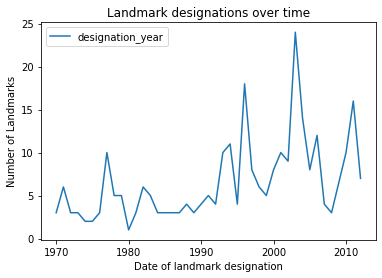

In [119]:
landmark = final_df.groupby(["designation_year"]);
landmark_count = landmark["designation_year"].count()
landmark_count
landmark_count_df=pd.DataFrame(landmark_count)
landmark_count_df.head()
landmark_count_df.plot(kind = "line", title="Landmark designations over time")
plt.xlabel("Date of landmark designation")
plt.ylabel("Number of Landmarks")
plt.show()

In [120]:
##print the landmark info for the first landmark that was recognized 
designation_year_min_df=clean_df.loc[clean_df['designation_year'].idxmin()]
designation_year_min_df

landmark_name                                           John J. Glessner House
id                                                                       L-104
address                                                      1800 S Prairie Av
designation_year                                                          1970
start_built_year                                                          1886
architect                                              Henry Hobson Richardson
location                     {'latitude': '41.8577246412', 'longitude': '-8...
latitude                                                        41.85772464120
longitude                                                      -87.62121065590
landmark_designation_date                                           1970-10-14
recognize_time                                                              84
Name: 43, dtype: object

In [123]:
#print the landmark info for the last landmark that was recognized 
designation_year_max_df=clean_df.loc[clean_df['designation_year'].idxmax()]
designation_year_max_df

landmark_name                 (Former) Pioneer Trust and Savings Bank Building
id                                                                       L-318
address                                                     4000 W. North Ave.
designation_year                                                          2012
start_built_year                                                          1924
architect                                                     Karl M. Vitzthum
location                     {'latitude': '41.9101921054', 'longitude': '-8...
latitude                                                        41.91019210540
longitude                                                      -87.72661734150
landmark_designation_date                                           2012-06-06
recognize_time                                                              88
Name: 5, dtype: object